/tmp/ipykernel_193847/2288287957.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Classification Report:
              precision    recall  f1-score   support

    Business       0.60      1.00      0.75         3
    Politics       1.00      0.25      0.40         4
      Sports       0.91      1.00      0.95        10

    accuracy                           0.82        17
   macro avg       0.84      0.75      0.70        17
weighted avg       0.88      0.82      0.79        17

Confusion Matrix:
[[ 3  0  0]
 [ 2  1  1]
 [ 0  0 10]]


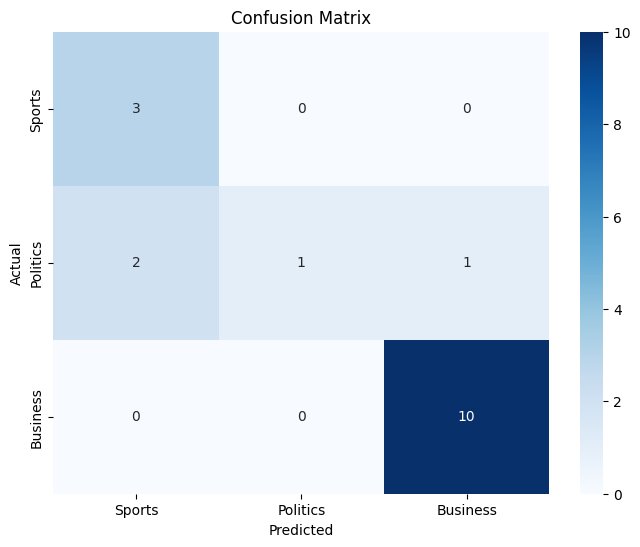

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde los archivos Excel
df_sports = pd.read_excel('deportes.xlsx')
df_politics = pd.read_excel('politica.xlsx')
df_business = pd.read_excel('negocios.xlsx')

# Combinar los datos en un solo DataFrame
df = pd.concat([df_sports, df_politics, df_business], ignore_index=True)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df['Title'].astype(str), df['Category'], test_size=0.2, random_state=42)

# Vectorización de los datos de texto
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Entrenamiento del modelo de Bosques Aleatorios
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sports', 'Politics', 'Business'], yticklabels=['Sports', 'Politics', 'Business'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
